<a href="https://colab.research.google.com/github/SaraBudimir004/RacunalniVid/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Plotting, Noise and Noise Removal

These laboratory excersises are solved on Google Colab and are save on GitHub repo that is connected to GitHub Classroom.

## Tools You need to use to Submit Assignments

In this document, you will solve tasks. This is a Jupyter Notebook which has the **.ipynb** extension, is an interactive web environment for data analysis, visualization, solution presentations, education, and more.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including the use of Google's CPU, GPU, and TPU resources. Colab is like Google Docs for Jupyter Notebooks. **Google Colab does not automatically save your assignment to GitHub.**

**You use GitHub to save and submit your assignments.** When you accept the assignment through GitHub Classroom, a repository is automatically created on your GitHub account with a copy of the task. This is where you will save your solutions. Saving your solutions submits the tasks for that lab.

## How to Solve the Tasks?
1. Accept the task via the Google Classroom link that you will receive. Google Classroom will create a repository on your account.
2. Go to the newly created repository on your account and click on the .ipynb file, then click Open in Colab.
3. You will solve the tasks in Google Colab.

## How to Save (Submit) Tasks?

1. In Google Colab, click on the Open settings gear icon in the top-right corner.
2. Click on the GitHub tab and check the box for Access private repositories and organizations.
3. A new window will open for you to grant access to GitHub. For ferit-osirv, click Grant.
4. Save and exit the settings.
5. Click on File > Save a copy in GitHub.
6. Select the lab repository that includes your name.

> *Note:* You only need to complete steps 1-4 the first time.

7. Click on **File > Save a copy in GitHub**.
8. Select created repository **koji uključuje vaše ime**.

## Copying Files from the GitHub Repository

For completing the exercises, you will need images and other files that will be stored in the GitHub repository of the exercise. A command like this will be available in the notebook for each exercise. It will copy the files from GitHub to the Google Colab environment.

**You need to run this command before starting each exercise.**

In [1]:
!rm -rf clone && git clone https://github.com/pui-sum-rv/lab3 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 53 (delta 11), reused 38 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 5.00 MiB | 26.26 MiB/s, done.
Resolving deltas: 100% (11/11), done.


**Google Colab will occasionally delete all files**. Therefore, you might need to rerun this command between sessions. If you encounter errors indicating that files do not exist, try running the command again.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Introduction to Matplotlib

Matplotlib is probably the most commonly used Python package for 2D graphics visualization. This package provides a fast way to visualize data from Python, as well as the ability to create high-quality images in many different formats.

`matplotlib.pyplot` is a collection of functions that make matplotlib behave similarly to MATLAB, making it easy for those with experience in MATLAB plotting to quickly adapt.

`matplotlib.pyplot` is _stateful_, which means it keeps track of the current figure, and all commands are directed at that figure.

### Simple Plots

In this section, we will show how to use matplotlib to plot some simple graphs. We'll start with the default settings, and then gradually improve the appearance of the graphs.

As the first step, we need to create the data that we will display on the plots.

In [3]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

The above code will create a numpy array `X` with 256 elements in the range from $`-\pi`$ to $`\pi`$.

After that, we store the cosines and sines of each element in `X` into variables `C` and `S`. Thus, the arrays `C` and `S` have the same number of elements as the array `X`, which we can confirm with the following code.

In [4]:
print(X.shape, X.min(), X.max())
print(C.shape, C.min(), C.max())
print(S.shape, S.min(), S.max())

(256,) -3.141592653589793 3.141592653589793
(256,) -1.0 0.9999241101148306
(256,) -0.9999810273487268 0.9999810273487268


To be able to plot the given arrays, we need to include the matplotlib package in our script.

In [5]:
import matplotlib.pyplot as plt

Now, the plotting functions of matplotlib are included in our script under the name `plt`, and we access them with `plt.`. The basic function for plotting is `plot()`, which we call with `plt.plot(variable_name)`, and it accepts one or more parameters. If we provide a single parameter, the function assumes that all values in the given variable should be plotted on the $`y`$ axis, while it assigns values from 0 to the number of elements in the variable to the $`x`$ axis. The function `plt.show()` is used to display the plot created by the `plot()` function.

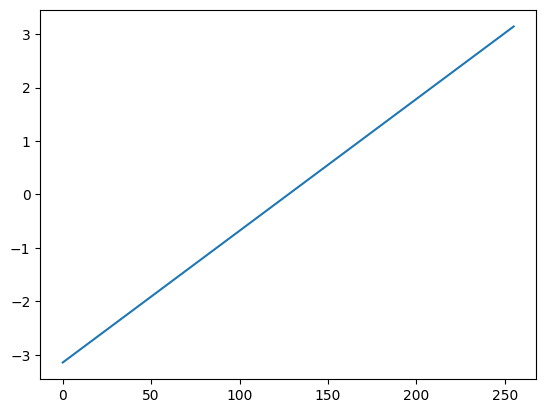

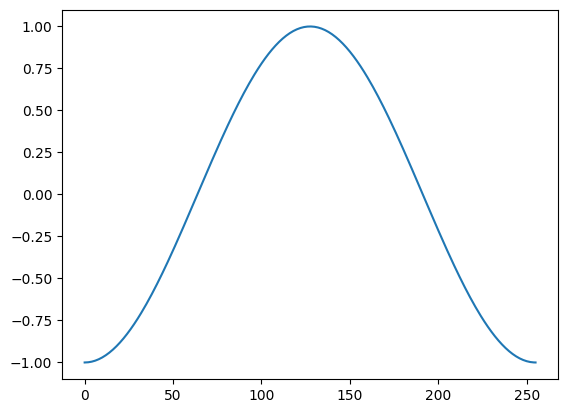

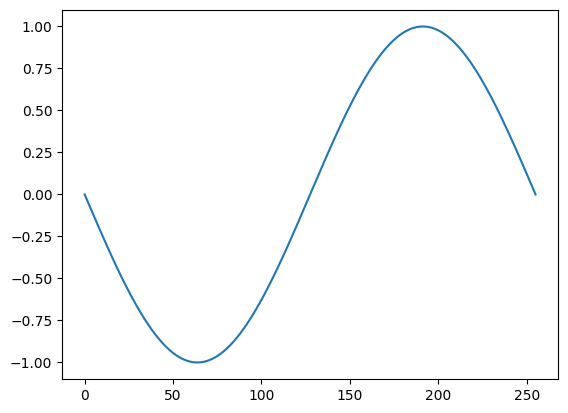

In [6]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot( X )
plt.show()
plt.plot( C )
plt.show()
plt.plot( S )
plt.show()

If we want to plot two variables where one depends on the other, as in this case where `X` is the independent variable and `C` and `S` are dependent variables, we will provide both variables as parameters to the function. First, we pass the independent variable (`X`), which will be plotted on the $`x`$ axis, followed by the dependent variable (`C` or `S`), which will be plotted on the $`y`$ axis.

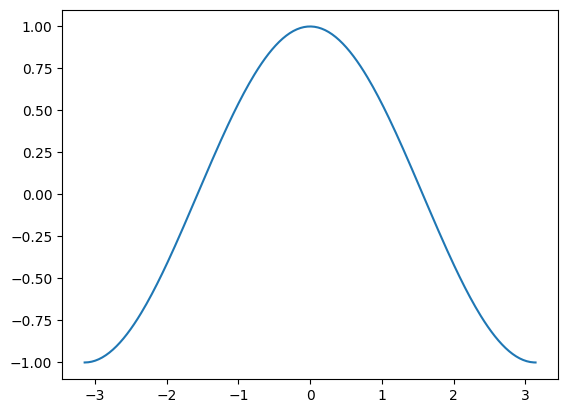

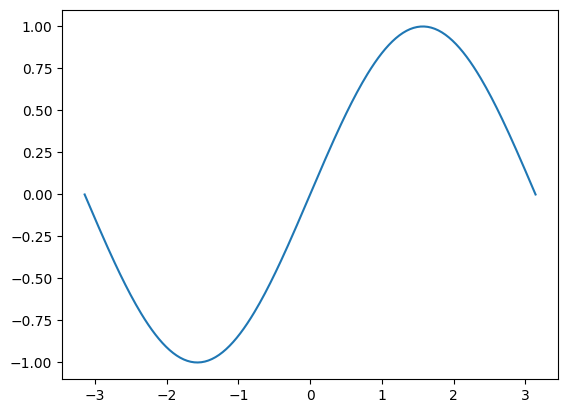

In [7]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot( X, C )
plt.show()
plt.plot( X, S )
plt.show()

If we want to plot more than one variable on the same graph, we add them using the `plot()` function, without calling `plt.show()` in between. This approach is equivalent to the `hold on` command in MATLAB. Calling the `plt.show()` function displays the current graph on the screen, and all subsequent `plt.plot()` function calls are executed on a new graph, which is also displayed with another call to the `plt.show()` function.

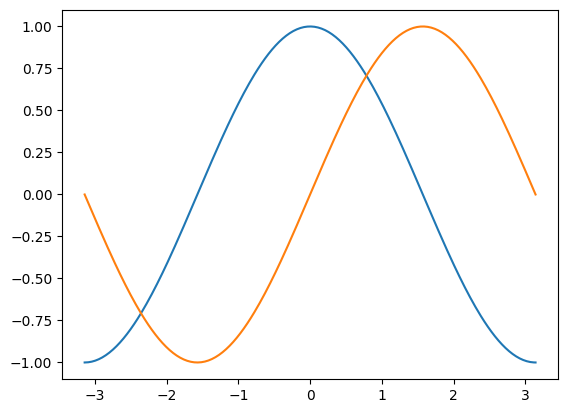

In [8]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot( X, C )
plt.plot( X, S )
plt.show()

It is possible, using similar syntax to MATLAB, to add axis labels, graph titles, change colors, line thickness, shapes, and more. Additionally, you can render mathematical formulas directly within the text on the graph using LaTeX syntax. Take a look at the following example:

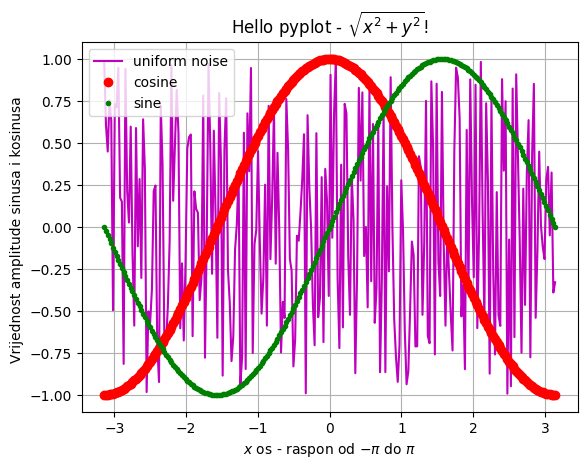

In [9]:
X    = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
R    = np.random.uniform(-1,1,256) #uniformni šum od -1 do 1

plt.plot( X, R, 'm-', label="uniform noise") #boja magenta, linija
plt.plot( X, C, 'ro', label="cosine")        #boja red, krugovi
plt.plot( X, S, 'g.', label="sine" )         #boja green, točkice
plt.xlabel(r"$x$ os - raspon od $-\pi$ do $\pi$ ")
plt.ylabel(r"Vrijednost amplitude sinusa i kosinusa ")
plt.title(r"Hello pyplot - $\sqrt{x^2 + y^2}$!")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In the example above, we notice r"letter 'r' before strings" in functions like xlabel, ylabel, and title. The reason for this is the backslash (\) characters within the string. The letter r before a string indicates that it is a raw string, meaning that the characters inside the string will not be escaped. These backslashes are necessary because matplotlib includes a LaTeX interpreter that converts LaTeX syntax into mathematical formulas.

#### Vertical Lines
Another common way to represent data in graphs, besides curves, is by using vertical lines. This is often used for quantitatively displaying data by categories (e.g., how many members belong to each category). A commonly used example is displaying exam results. In this case, we have 5 vertical lines representing 5 grades, and the height of each vertical line (or bar) represents how many grades fall into that category. Let's take a look at the following example:

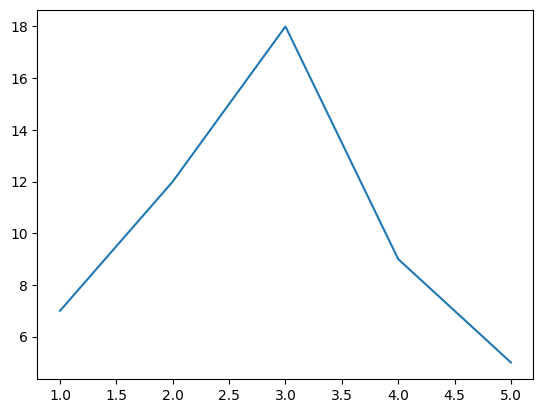

In [10]:
broj_ocjena = [ 7, 12, 18, 9, 5 ]
ocjene = [ 1, 2, 3, 4, 5 ]

plt.plot(ocjene, broj_ocjena)

<BarContainer object of 5 artists>

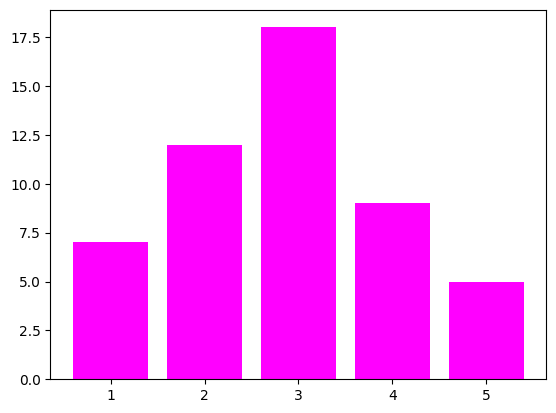

In [11]:
plt.bar(ocjene, broj_ocjena, color='magenta') #moguće je mijenjati boju stupaca

From this graph, it is immediately clear what the grades are, how many categories of grades there are, and which grades are most common. However, what if we have many categories that need to be displayed? An example is if we want to show the change in temperature over a part of the year, and we have 150 days for which we want to display the temperature for each individual day.

In this case, using individual vertical bars for each day would make the graph cluttered and difficult to interpret. Instead, we could use a line plot to represent this type of data. Line plots are more suitable for showing trends over time, especially when there are many data points.

Here's an example using a line plot to display temperature over 150 days:

<BarContainer object of 150 artists>

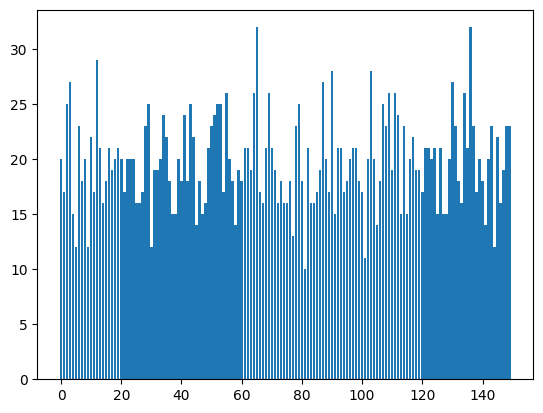

In [12]:
temps = np.random.poisson(20,150) #uzima 150 random vrijednosti iz poissonove distribucije

plt.bar(np.arange(len(temps)), temps)

In such a case, the graph doesn't look very appealing because matplotlib tries to outline each bar with a black line and fill the bar with a color (default is blue). When we have many categories to display, a better approach is to draw only a vertical line instead of a bar. This can be done using the plt.vlines() function.

Here's an example of how to use plt.vlines() to represent temperature changes over multiple days:

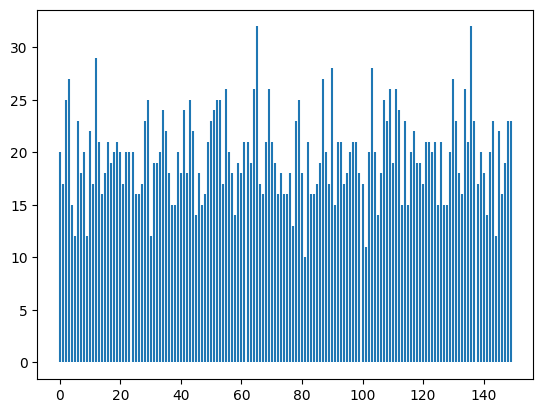

In [13]:
plt.vlines(np.arange(len(temps)), 0 , temps)

In the previous example, the plt.bar() function took two parameters: arrays of values for the $x$ and $y$ axes. The plt.vlines() function takes three parameters, where the first parameter is, like in plt.bar(), the array of values on the $x$ axis. The second parameter here is the minimum value of the line on the $y$ axis, and the third parameter is the values on the $y$ axis up to which the lines should be drawn.

As with the previous examples, vertical lines can also be customized, such as changing their color, adding text, and plotting multiple different types of plots on the same graph.

Here's an example showing how to customize vertical lines and combine multiple types of plots:

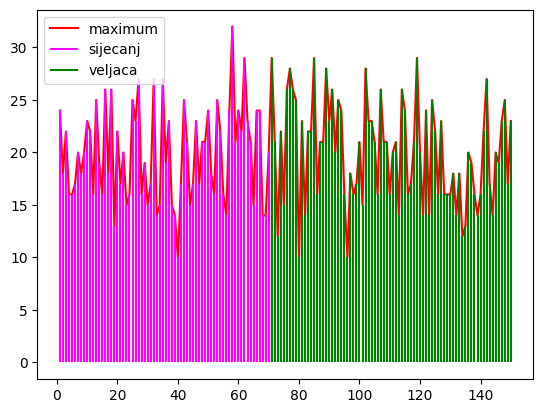

In [14]:
temps = np.random.poisson(20,150)
temps3 = temps.copy()
temps2 = np.zeros_like(temps)
temps2[70:] = temps[70:].copy()
temps[70:] = 0

plt.plot(np.arange(1,len(temps3)+1), temps3, label="maximum", color="red")
plt.vlines(np.arange(1,len(temps)+1),0, temps, label="sijecanj", color="magenta")
plt.vlines(np.arange(1,len(temps2)+1),0, temps2, label="veljaca", color="green")
plt.legend(loc="upper left")
plt.show()

## Noise

Wikipedia: [Image noise]( https://en.wikipedia.org/wiki/Image_noise )

### Gaussian noise

Gaussian noise represents statistical noise where the probability of a particular value occurring follows a normal or Gaussian distribution.

The probability of occurrence for a random value $z$ is given by:

![gauss formula](https://upload.wikimedia.org/math/c/7/0/c70012e2b38059f77ba8b6bb4cea7e2c.png)

where $z$ is the gray level, $\mu$ is the mean value, and $\sigma$ is the standard deviation.

The Gaussian distribution with given parameters $\mu$ and $\sigma$ looks like:

![gauss distrib](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png)

Više o Gaussovom šumu:

- [Gaussian distribution](https://en.wikipedia.org/wiki/Gaussian_distribution)
- [Gaussian noise](https://en.wikipedia.org/wiki/Gaussian_noise)

**We can plot the shape of a Gaussian distribution using the following code:**


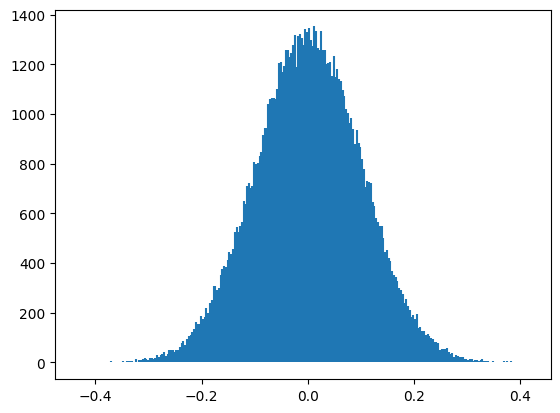

In [15]:
mu = 0
sigma = 0.1
gauss = np.random.normal(mu, sigma, 100000)
hist,bins = np.histogram(gauss, bins=256 )
plt.vlines(bins[1:], 0, hist)

### Uniform noise


Uniform noise, also known as quantization noise, typically occurs during the quantization of pixel values in an input image to a certain number of discrete levels. It has an approximately uniform distribution, meaning that every value within a certain range has an equal probability of occurring.

![uniform_formula](https://upload.wikimedia.org/math/8/f/b/8fbfebfbb3dfa135da807a45374376d5.png)

where $a$ and $b$ are the boundaries within which a value can occur.

Here is what a uniform distribution looks like:

![uniform_dist](https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg)

More about this topic can be found here:

- [ Quantization (Uniform) noise ](https://en.wikipedia.org/wiki/Image_noise#Quantization_noise_.28uniform_noise.29)
- [ Uniform distribution ]( https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29)

### Salt and pepper noise

Salt and pepper noise is a type of noise where a certain percentage of random pixels in the image are either white or black.

![snp](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Noise_salt_and_pepper.png/220px-Noise_salt_and_pepper.png)

## Noise Implementation

The following code contains an implementation of two types of noise:


In [16]:
def gaussian_noise(img, mu, sigma):
  # generiraj nasumicne brojeve Gaussove distribucije
  noise = np.random.normal(mu, sigma, img.shape)
  return noise.astype(np.uint8)

def salt_n_pepper_noise(img, percent=10):
  limit = ((float(percent)/2.0)/100.0) * 255.0
  noise = np.random.uniform(0,255, img.shape)
  return noise.astype(np.uint8)

## Task 1

Load an arbitrary image and add Gaussian noise to it using the function defined above. Display the original image and the image with added noise in the same code cell. When displaying the images, set the `imshow` argument `cmap='gray'`. Assign a title to each image that corresponds to it (With Noise / Without Noise).

Tip: You can use `plt.show()` to display the current state on the screen and allow plotting of a new graph.

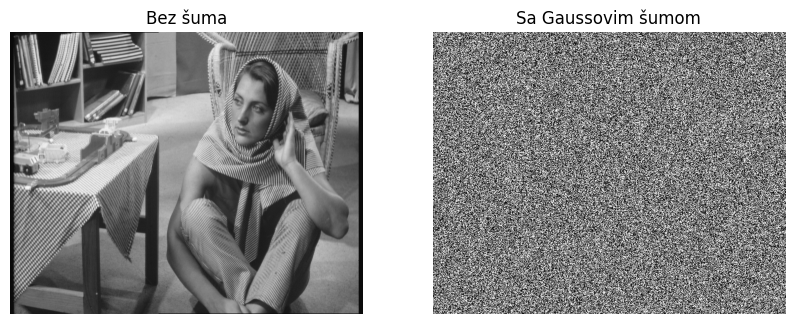

In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def gaussian_noise(img, mu, sigma):
  noise = np.random.normal(mu, sigma, img.shape)
  return noise.astype(np.uint8)

def salt_n_pepper_noise(img, percent=10):
  limit = ((float(percent)/2.0)/100.0) * 255.0
  noise = np.random.uniform(0,255, img.shape)
  return noise.astype(np.uint8)

img = cv.imread('images/barbara.bmp', cv.IMREAD_GRAYSCALE)

#Gaussov šum
img_noisy = gaussian_noise(img, mu=0, sigma=25)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Bez šuma')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('Sa Gaussovim šumom')
plt.axis('off')

plt.show()

## Task 2

Using the `plt.hist` function, display the histogram of the original image and the image with added noise in the same code cell. Assign a title to each histogram. Set the `bins` parameter to the maximum value suitable for the image. Tip: Numpy arrays have a `.flatten()` method that converts the matrix into a 1D array of numbers.

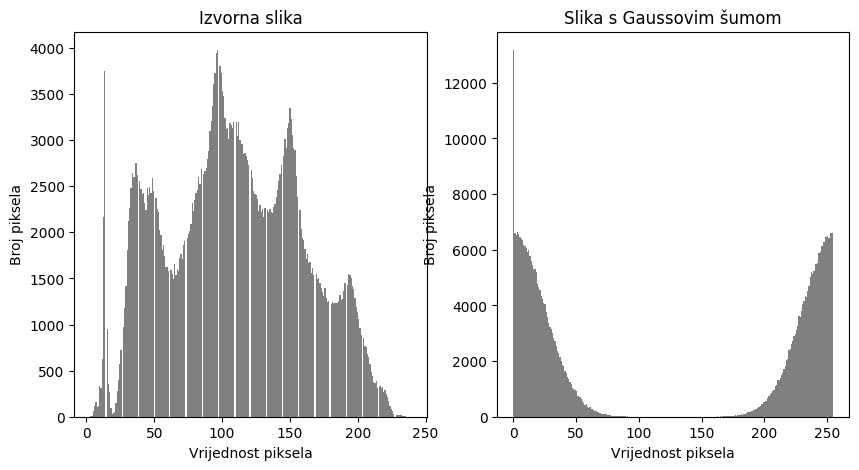

In [48]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(img.flatten(), bins=256, color='gray')
plt.title('Izvorna slika')
plt.xlabel('Vrijednost piksela')
plt.ylabel('Broj piksela')

plt.subplot(1, 2, 2)
plt.hist(img_noisy.flatten(), bins=256, color='gray')
plt.title('Slika s Gaussovim šumom')
plt.xlabel('Vrijednost piksela')
plt.ylabel('Broj piksela')

plt.show()


## Task 3

Based on the `gaussian_noise` function and the formula for uniform noise above, implement a function that returns uniform noise for the parameters `a` and `b`.

In [49]:
def uniform_noise(img, a, b):
    noise = np.random.uniform(a, b, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255)
    return noisy_img.astype(np.uint8)


Display in the same code cell the original image, the same image with Gaussian noise, and the same image with uniform noise.


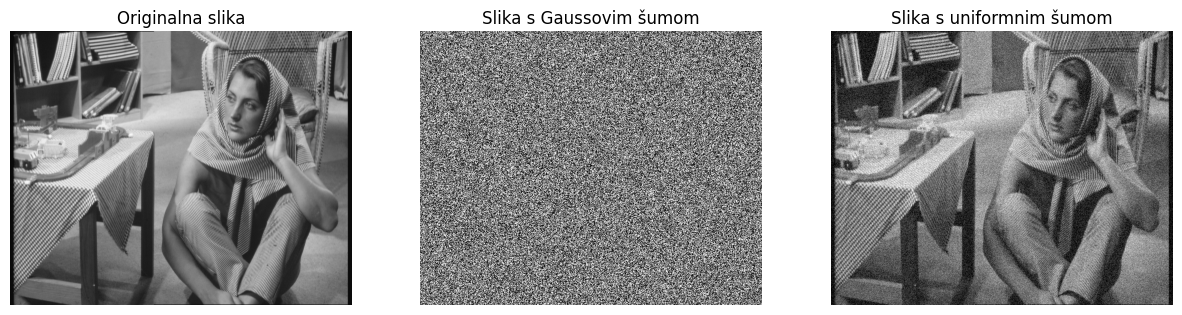

In [41]:
img_uniform_noisy = uniform_noise(img, a=-40, b=40)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Originalna slika')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_noisy, cmap='gray')
plt.title('Slika s Gaussovim šumom')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_uniform_noisy, cmap='gray')
plt.title('Slika s uniformnim šumom')
plt.axis('off')

plt.show()


# Median filtering

### Brief Description

The median filter is normally used to reduce noise
in an image, somewhat like the mean  (averaging) filter. However, it often does a
better job than the mean filter of preserving useful detail in the
image.


### How It Works

Like the mean (averaging) filter, the median filter considers each pixel in the
image in turn and looks at its nearby neighbors to decide whether or
not it is representative of its surroundings. Instead of simply
replacing the pixel value with the <EM>mean</EM> of neighboring pixel
values, it replaces it with the <EM>median</EM> of those values. The
median is calculated by first sorting all the pixel values from the
surrounding neighborhood into numerical order and then replacing the
pixel being considered with the middle pixel value.  (If the
neighborhood under consideration contains an even number of pixels,
the average of the two middle pixel values is used.) Following image
illustrates an example calculation.

<CENTER><IMG ALT="" SRC="http://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/med3x3.gif"></CENTER>

 Calculating the median value of a pixel neighborhood. As
can be seen, the central pixel value of 150 is rather unrepresentative
of the surrounding pixels and is replaced with the median value:
124. A 3&#215;3 square neighborhood is used here --- larger
neighborhoods will produce more severe smoothing.

### Guidelines for Use

<P>By calculating the median value of a neighborhood rather than the
mean value, the median filter has two main advantages over
the mean filter:

- The median is a more robust average than the mean and so a
single very unrepresentative pixel in a neighborhood will not affect
the median value significantly.

- Since the median value must actually be the value of one of the
pixels in the neighborhood, the median filter does not create new
unrealistic pixel values when the filter straddles an edge. For this
reason the median filter is much better at preserving sharp edges than
the mean filter.

You can use median filter with the following code:

```
median = cv2.medianBlur( image, radius )
```

where image is numpy array containing the image, and radius is an integer which
defines the radius of the neighborhood for filtering.

You can use gaussian blur filter with the following code:

```
blur = cv2.GaussianBlur( image, (kernelXsize, kernelYsize), sigma )
```

where image is numpy array containing the image, (kernelXsize, kernelYsize) is
a tuple containing the size of the kernel ( e.g. `(5, 5)` for 5x5 kernel ) and
sigma is the value of $`  \sigma  `$ parameter.

## Task 4

Corrupt an arbitrary image with 10% salt and pepper noise. Apply a median filter to the image and display the original and filtered images. Visually determine the best filter parameters that will remove the noise but not blur the image too much.

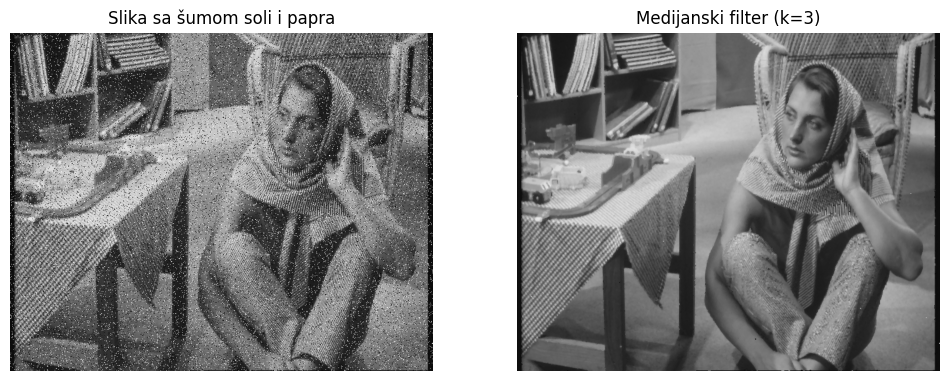

In [50]:
def salt_and_pepper_noise(img, percent=10):
    noisy_img = img.copy()
    total_pixels = img.size
    num_salt = int(total_pixels * percent / 200)
    num_pepper = int(total_pixels * percent / 200)

    coords = [np.random.randint(0, i, num_salt) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 255

    coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 0

    return noisy_img

img_snp = salt_and_pepper_noise(img, percent=10)

median_filtered = cv.medianBlur(img_snp, 3)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_snp, cmap='gray')
plt.title('Slika sa šumom soli i papra')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Medijanski filter (k=3)')
plt.axis('off')

plt.show()


Apply Gaussian blur to the corrupted image and display the original and filtered images. Visually determine the best filter parameters that will remove the noise without blurring the image too much.

## Task 5

Corrupt an arbitrary image with Gaussian noise with sigma = 15. Apply a median filter to the image and display the original and filtered images. Visually determine the best filter parameters that will remove the noise without blurring the image too much.

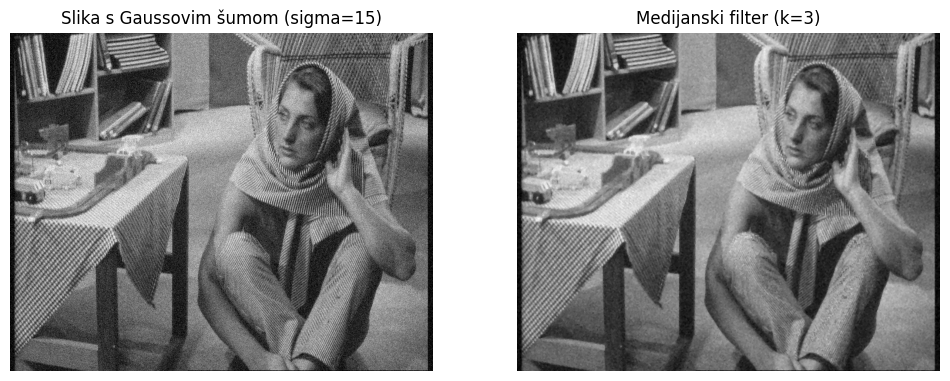

In [51]:
def add_gaussian_noise(img, sigma=15):
    noise = np.random.normal(0, sigma, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255)
    return noisy_img.astype(np.uint8)

img_gauss_noisy = add_gaussian_noise(img, sigma=15)

median_filtered = cv.medianBlur(img_gauss_noisy, 3)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_gauss_noisy, cmap='gray')
plt.title('Slika s Gaussovim šumom (sigma=15)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Medijanski filter (k=3)')
plt.axis('off')

plt.show()


Apply Gaussian blur to the corrupted image and display the original and filtered images. Visually determine the best filter parameters that will remove the noise without blurring the image too much.

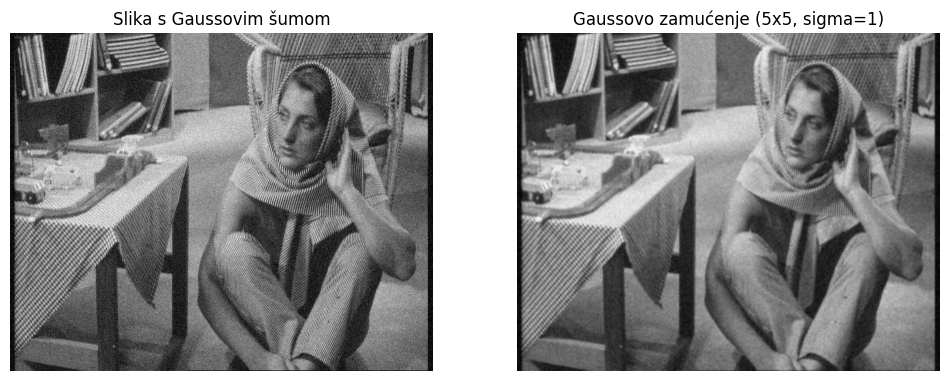

In [52]:
gaussian_filtered = cv.GaussianBlur(img_gauss_noisy, (5,5), 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_gauss_noisy, cmap='gray')
plt.title('Slika s Gaussovim šumom')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussovo zamućenje (5x5, sigma=1)')
plt.axis('off')

plt.show()


Don't forget to save the notebook. :)